In [1]:
# generate the DMS protein sequence for each library
import DMS_proseq_generator
from typing import List
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from Bio import SeqIO
from Bio.Seq import Seq
import os
import gzip

/Users/weiqiyao/opt/anaconda3/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# realize for the smurfp, we did the processing of dropping the mutations that introduce Cys
DMS_order_df = pd.read_csv('20220608Synoligofinal.csv', index_col=False)
DMS_order_df = DMS_order_df.drop(DMS_order_df.columns[0], axis=1)

In [3]:
DMS_order_df2 = DMS_proseq_generator._convert_DMSoligo2aa(DMS_order_df)
DMS_smurfp_order = DMS_order_df2[DMS_order_df2['ID'].str.contains('Smurfp')]
DMS_smurfp_order.head()

Multiple BsaI found. Check the sequence manually 
ID:T7lig_Mut280-306_Phe306Trp
SequenceGTGCTAAGTCACACTGTTGGTCGGTCTCCTAATGCCACCAACATTTCTCGCGCGCTTATGGACGAGTTTACCGAAACGGTTAAAGAGGCCACGTTGTCACAGTGGGGATTCTGGTCTCGGAGACCCACGCCAGTTGTGAACATAACC


/Users/weiqiyao/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,ID,length,seq,oligo_aa
16208,Smurfp_Mut2-27_Lys2Asp,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGGACACTTCTGAA...,MDTSEQRVNIATLLTENKKKIVDKASQD
16209,Smurfp_Mut2-27_Lys2Ser,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGTCAACTTCTGAA...,MSTSEQRVNIATLLTENKKKIVDKASQD
16210,Smurfp_Mut2-27_Lys2Gln,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGCAGACTTCTGAA...,MQTSEQRVNIATLLTENKKKIVDKASQD
16211,Smurfp_Mut2-27_Lys2Met,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGATGACTTCTGAA...,MMTSEQRVNIATLLTENKKKIVDKASQD
16212,Smurfp_Mut2-27_Lys2Asn,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGAATACTTCTGAA...,MNTSEQRVNIATLLTENKKKIVDKASQD


In [4]:
Smurfpwt = 'MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQRDRALCLRDYGWFLHLITFCLLAGDKGPIESIGLISIREMYNSLGVPVPAMMESIRCLKEASLSLLDEEDANETAPYFDYIIKAMSEFHH'
DMS_smurfp_info = DMS_proseq_generator.extract_mut_info(DMS_smurfp_order, Smurfpwt)
DMS_smurfp_info.head()

,ID,length,seq,oligo_aa,Proseq,Proseq_len,mut_type,mut_aa,mut_loc
16208,Smurfp_Mut2-27_Lys2Asp,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGGACACTTCTGAA...,MDTSEQRVNIATLLTENKKKIVDKASQD,MDTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,136,Mut,Asp,2
16209,Smurfp_Mut2-27_Lys2Ser,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGTCAACTTCTGAA...,MSTSEQRVNIATLLTENKKKIVDKASQD,MSTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,136,Mut,Ser,2
16210,Smurfp_Mut2-27_Lys2Gln,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGCAGACTTCTGAA...,MQTSEQRVNIATLLTENKKKIVDKASQD,MQTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,136,Mut,Gln,2
16211,Smurfp_Mut2-27_Lys2Met,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGATGACTTCTGAA...,MMTSEQRVNIATLLTENKKKIVDKASQD,MMTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,136,Mut,Met,2
16212,Smurfp_Mut2-27_Lys2Asn,147,AGTAGCCCACGATATCGTTTCTCGGTCTCCTATGAATACTTCTGAA...,MNTSEQRVNIATLLTENKKKIVDKASQD,MNTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,136,Mut,Asn,2


In [5]:
# map the coverage of DMS NGS lib
# The reference is the protein sequence I generated
smurfp_NGS_df = pd.read_csv('final_filtered_smurfp.csv', index_col=False)
smurfp_NGS_df = smurfp_NGS_df.drop(smurfp_NGS_df.columns[0], axis=1)
smurfp_NGS_df.head()

,Proseq,count,Seqlen
0,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,16,134
1,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLSAPGGIAFSQ...,1,134
2,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1,135
3,MKTSEQRVNIATLLTENKKKIVDKASQDLWRHHPDLIAPGGIAFSQ...,13,134
4,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,21,135


In [6]:
smurfp_NGS_dfv2 = smurfp_NGS_df.copy()
smurfp_NGS_dfv2['Proseq'] = smurfp_NGS_df['Proseq'] + 'HH'

In [7]:
NGS_capture_merged_df = pd.merge(smurfp_NGS_dfv2, DMS_smurfp_info[['ID','Proseq', 'Proseq_len','mut_type','mut_aa','mut_loc']], how='inner', on='Proseq')

In [8]:
# now we recover the full proseq in oligo pool, and filter the sequence in the NGS pool which exactly matches the DMS design pool
# The actual captured seq number is lower than the number when we calculate the coverage, because the coverage only maps of the mutation site. In that case, in addition to the one mutation site in DMS oligo pool, there might be other mutation site introduced during PCR or propagation in the rest of protein sequence. Here we look for the full protein sequence.
len(NGS_capture_merged_df)

4855

In [9]:
# Recalculate the coverage based on precise mapping
# total coverage
coverage_v2 = len(NGS_capture_merged_df) / len(DMS_smurfp_order)
coverage_v2

0.9867886178861789

In [10]:
NGS_capture_merged_df = NGS_capture_merged_df.drop(columns='Seqlen')
NGS_capture_merged_df.head()

,Proseq,count,ID,Proseq_len,mut_type,mut_aa,mut_loc
0,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,16,Smurfp_Mut82-108_Ile83Asn,136,Mut,Asn,83
1,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1,Smurfp_Ins109-135_INS119Phe,137,Ins,Phe,119
2,MKTSEQRVNIATLLTENKKKIVDKASQDLWRHHPDLIAPGGIAFSQ...,13,Smurfp_Mut28-54_Arg32His,136,Mut,His,32
3,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,21,Smurfp_Ins55-81_INS81Trp,137,Ins,Trp,81
4,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,7,Smurfp_Mut109-135_Leu112Tyr,136,Mut,Tyr,112


In [11]:
# Coverage of single aa mutation
rep_NGS = len(NGS_capture_merged_df[NGS_capture_merged_df['Proseq_len'] == 136]) / len(DMS_smurfp_info[DMS_smurfp_info['Proseq_len'] == 136])
rep_NGS

0.9878048780487805

In [12]:
# Coverage of single aa insertion
ins_NGS = len(NGS_capture_merged_df[NGS_capture_merged_df['Proseq_len'] == 137]) / len(DMS_smurfp_info[DMS_smurfp_info['Proseq_len'] == 137])
ins_NGS

0.9855371900826446

In [13]:
# Coverage of single aa deletion
del_NGS = len(NGS_capture_merged_df[NGS_capture_merged_df['Proseq_len'] == 135]) / len(DMS_smurfp_info[DMS_smurfp_info['Proseq_len'] == 135])
del_NGS

0.9918032786885246

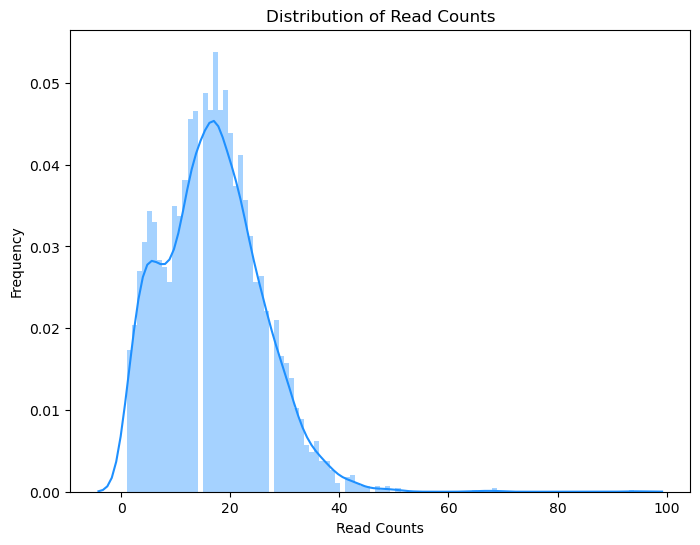

In [14]:
# plot the distribution of each mutation

plt.figure(figsize=(8, 6))
sns.distplot(NGS_capture_merged_df['count'], bins=100, color='dodgerblue')

plt.xlabel('Read Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Read Counts')
plt.show()

In [15]:
aalist = ['Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile',
                        'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val']

In [16]:
NGS_mut_df = DMS_proseq_generator._aa_distribution_heatmap(NGS_capture_merged_df, aalist, 'Mut',134)
NGS_mut_df

,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
Ala,0,0,0,12,18,34,22,44,24,29,...,5,13,4,9,10,0,3,7,4,8
Arg,0,2,0,9,26,32,0,28,19,16,...,1,5,9,8,4,7,7,5,6,3
Asn,0,1,1,10,21,18,21,11,0,31,...,6,6,3,8,9,4,6,3,3,9
Asp,0,0,0,11,19,21,23,20,23,28,...,0,4,5,8,3,10,7,6,12,3
Cys,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gln,0,0,0,6,23,0,30,22,27,35,...,4,2,4,4,8,3,2,7,4,2
Glu,0,4,0,10,0,21,36,18,35,25,...,5,3,6,5,1,8,1,6,0,5
Gly,0,0,0,12,24,28,16,31,35,19,...,3,2,7,2,3,3,5,1,2,8
His,0,0,5,28,17,28,23,21,31,22,...,6,2,11,8,4,6,8,2,11,2
Ile,0,1,5,15,23,22,39,27,34,0,...,1,6,0,0,7,6,7,6,3,3


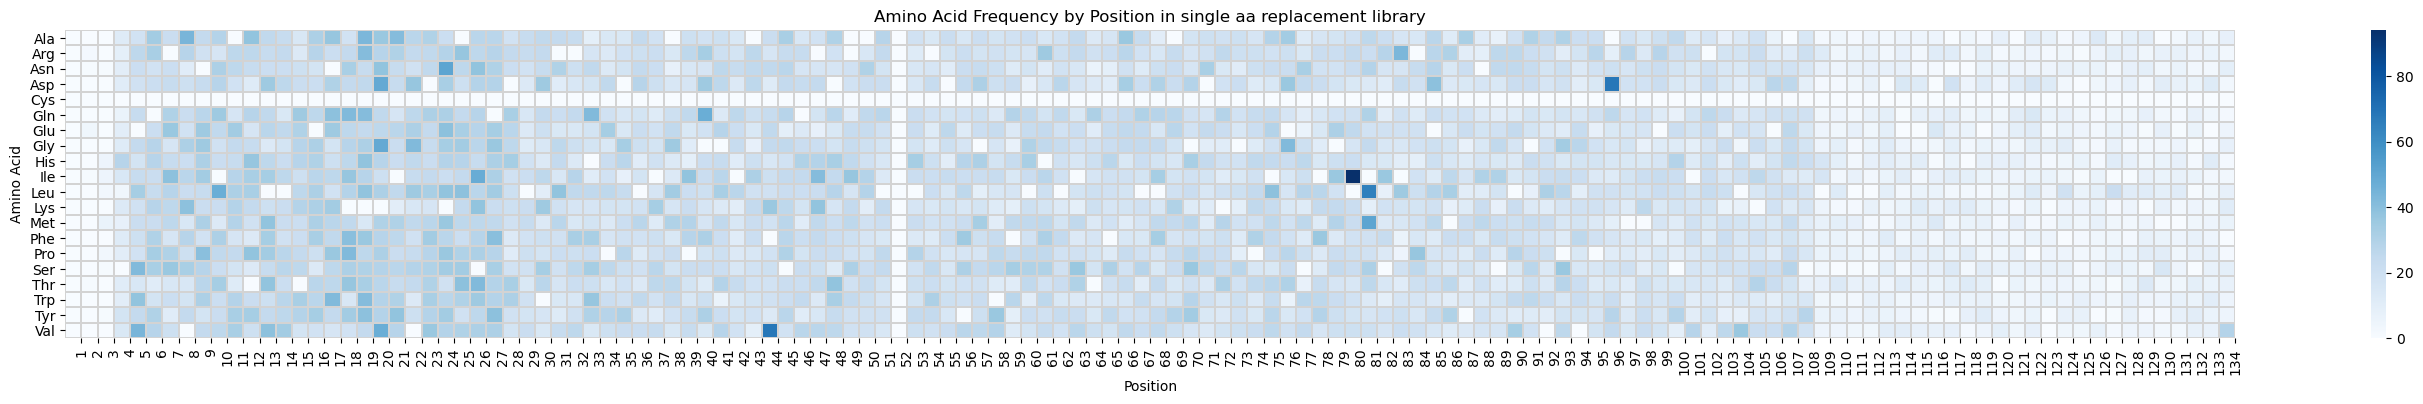

In [17]:
# plot single aa rep library, len = 134

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(NGS_mut_df, cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa replacement library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(1, 135, 1),labels=range(1, 135, 1))
plt.show()

## plot deletion by itself.(star sign)

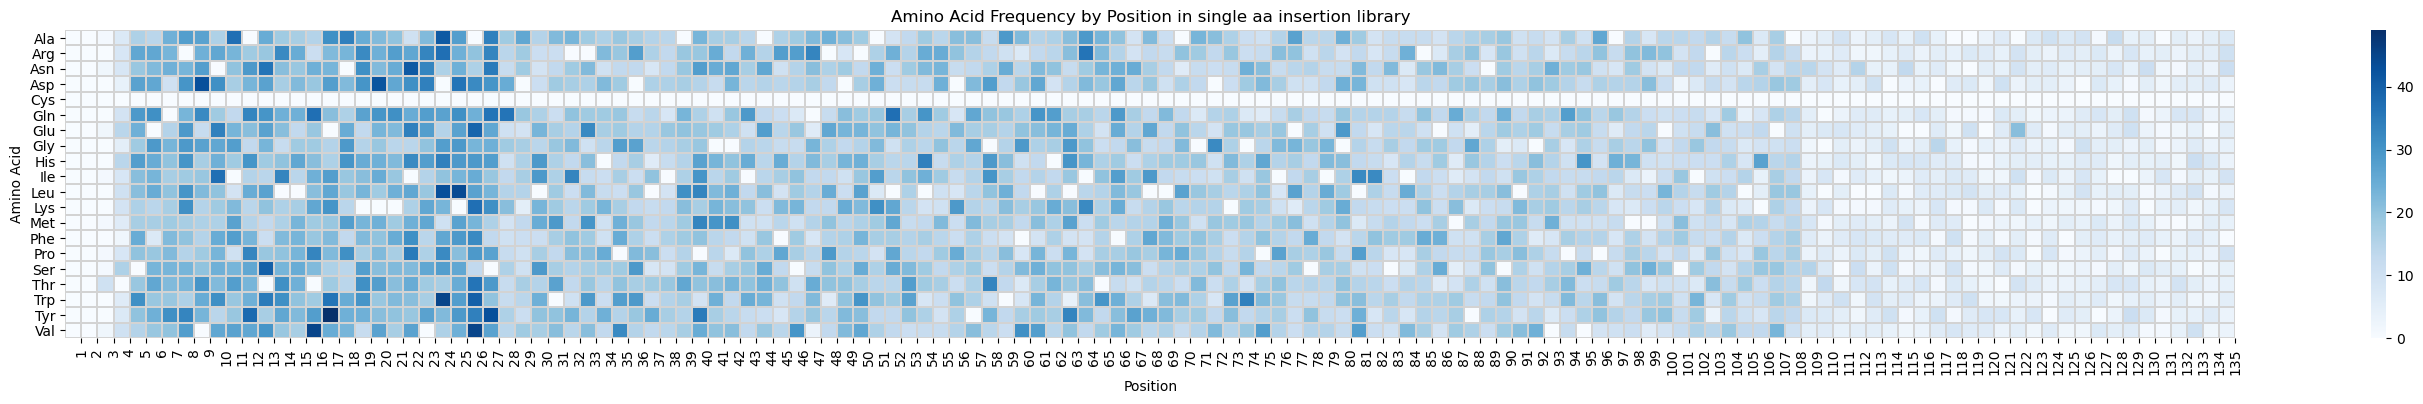

In [18]:
# plot single aa ins library, len = 134

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(DMS_proseq_generator._aa_distribution_heatmap(NGS_capture_merged_df, aalist, 'Ins',135), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa insertion library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(1, 136, 1),labels=range(1, 136, 1))
plt.show()

## plot deletion by itself.(star sign)

In [19]:
NGS_capture_merged_df[NGS_capture_merged_df['mut_type']== 'Del']

,Proseq,count,ID,Proseq_len,mut_type,mut_aa,mut_loc
7,MKTSQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQR...,41,Smurfp_Del2-27_Glu5null,135,Del,Glu,5
18,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,12,Smurfp_Del82-108_Ser108null,135,Del,Ser,108
26,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,3,Smurfp_Del109-135_Asp125null,135,Del,Asp,125
42,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,21,Smurfp_Del55-81_Glu76null,135,Del,Glu,76
50,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,35,Smurfp_Del82-108_Arg84null,135,Del,Arg,84
...,...,...,...,...,...,...,...
4767,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1,Smurfp_Del109-135_Tyr126null,135,Del,Tyr,126
4778,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,2,Smurfp_Del109-135_Leu111null,135,Del,Leu,111
4806,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,1,Smurfp_Del109-135_Tyr123null,135,Del,Tyr,123
4831,MKTSEQRVNIATLLTENKKKIVDKASQDLWRRHPDLIAPGGIAFSQ...,2,Smurfp_Del109-135_Met131null,135,Del,Met,131


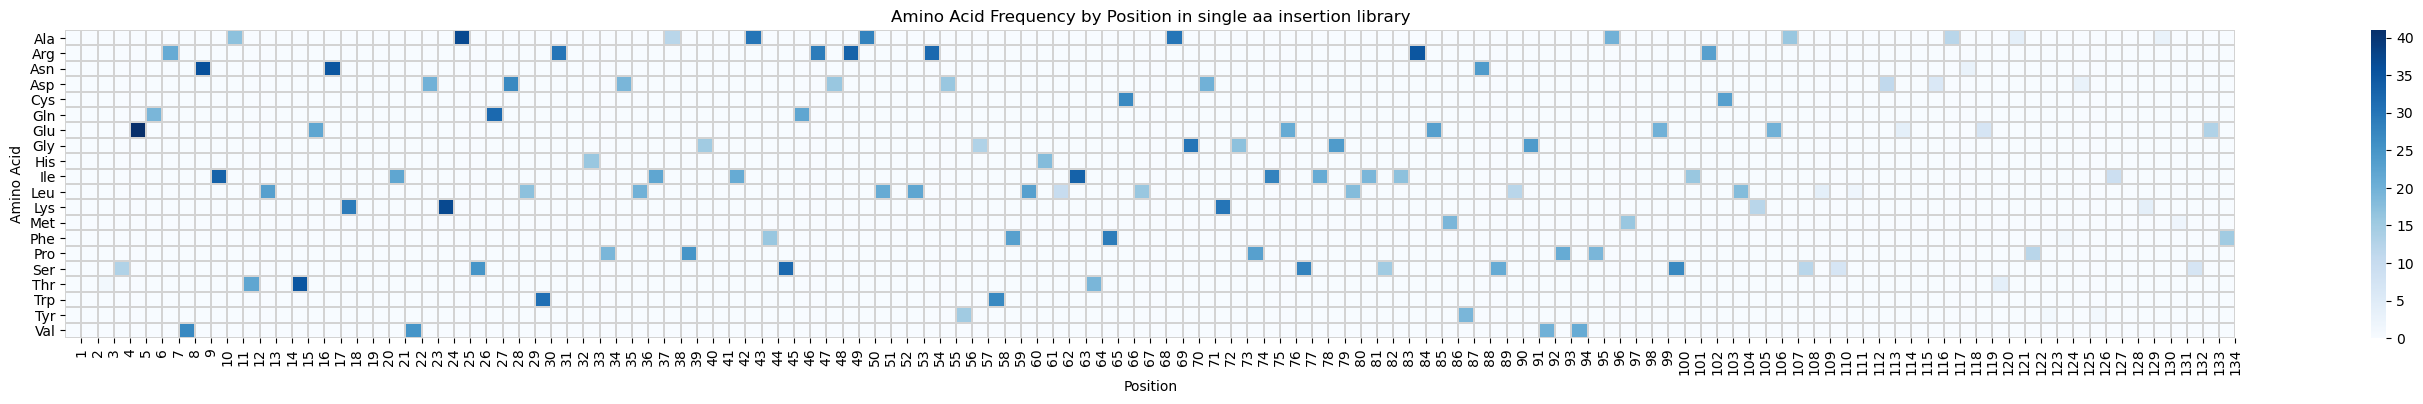

In [20]:

# plot single aa del library, len = 134

# Plotting the heatmap
plt.figure(figsize=(35, 4))
sns.heatmap(DMS_proseq_generator._aa_distribution_heatmap(NGS_capture_merged_df, aalist, 'Del',134), cmap='Blues', annot=False,linewidths=0.1, linecolor='lightgray')
plt.title('Amino Acid Frequency by Position in single aa insertion library')
plt.xlabel('Position')
plt.ylabel('Amino Acid')
plt.xticks(range(1, 135, 1),labels=range(1, 135, 1))
plt.show()
